# Census Data 
Comparison between Decision Tree and Random Forest using Census Data

In [1]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt

Preprocessing the data

In [3]:
train_data = pd.read_csv(r"C:/Users/justi/OneDrive/STUDY/Python/Census_Income_Dataset/Census_income_train.csv")
test_data = pd.read_csv(r"C:/Users/justi/OneDrive/STUDY/Python/Census_Income_Dataset/Census_income_test.csv")

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education-num   32560 non-null  int64 
 5   Marital status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital-gain    32560 non-null  int64 
 11  Capital-loss    32560 non-null  int64 
 12  Hours-per-week  32560 non-null  int64 
 13  Native-country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
train_data.describe()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581849,1.897833e+05,10.080682,1077.681941,87.238790,40.437469
std,13.640593,1.055478e+05,2.572760,7385.403083,402.795459,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
train_data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   Workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   Education       16281 non-null  object
 4   Education-num   16281 non-null  int64 
 5   Marital status  16281 non-null  object
 6   Occupation      16281 non-null  object
 7   Relationship    16281 non-null  object
 8   Race            16281 non-null  object
 9   Sex             16281 non-null  object
 10  Capital-gain    16281 non-null  int64 
 11  Capital-loss    16281 non-null  int64 
 12  Hours-per-week  16281 non-null  int64 
 13  Native-country  16281 non-null  object
 14  Income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [8]:
train_data.isnull().sum()

Age               0
Workclass         0
fnlwgt            0
Education         0
Education-num     0
Marital status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital-gain      0
Capital-loss      0
Hours-per-week    0
Native-country    0
Income            0
dtype: int64

In [14]:
# The dataset has entries with "?" in places where data is missing. in 3 columns: workclass, occupation and native-country
# find the indices of the rows that contain "?"

clean_train_data  = train_data[train_data["Workclass"].str.contains("\?") == False]
len(clean_train_data)

30724

In [36]:
clean_train_data  = clean_train_data[clean_train_data["Occupation"].str.contains("\?") == False]
len(clean_train_data)

C:\Users\justi\AppData\Local\Temp\ipykernel_51460\4115986460.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_train_data  = clean_train_data[train_data["Occupation"].str.contains("\?") == False]


30717

In [37]:
clean_train_data  = clean_train_data[clean_train_data["Native-country"].str.contains("\?") == False]
len(clean_train_data)

C:\Users\justi\AppData\Local\Temp\ipykernel_51460\58292310.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_train_data  = clean_train_data[train_data["Native-country"].str.contains("\?") == False]


30161

In [20]:
clean_train_data = clean_train_data.reset_index(drop = True)

## Creating dummy variables
Decision Trees and Random Forest can work on categorical and numerical data but Sklearn cannot work on categorical data. Therefore we need to create dummy variable and assign it to the categorical values. Will do this using one hot encoding.

In [25]:
train_dummy = pd.get_dummies(clean_train_data, drop_first = False)
train_dummy.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K,Income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,True,False,False,True,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [27]:
#dropping the Income_ <=50K as that is redundant column. 
train_dummy = train_dummy.drop(['Income_ <=50K'], axis = 1)
train_dummy.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ >50K
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
train_input = train_dummy.iloc[:,:-1]
train_target = train_dummy.iloc[:,-1]
train_input.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,39,77516,13,2174,0,40,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,83311,13,0,0,13,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,38,215646,9,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,53,234721,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
4,28,338409,13,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
train_target.head()

0    False
1    False
2    False
3    False
4    False
Name: Income_ >50K, dtype: bool

### Test dataset

In [31]:
test_data = pd.read_csv(r"C:/Users/justi/OneDrive/STUDY/Python/Census_Income_Dataset/Census_income_test.csv")

In [32]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             16281 non-null  int64 
 1   Workclass       16281 non-null  object
 2   fnlwgt          16281 non-null  int64 
 3   Education       16281 non-null  object
 4   Education-num   16281 non-null  int64 
 5   Marital status  16281 non-null  object
 6   Occupation      16281 non-null  object
 7   Relationship    16281 non-null  object
 8   Race            16281 non-null  object
 9   Sex             16281 non-null  object
 10  Capital-gain    16281 non-null  int64 
 11  Capital-loss    16281 non-null  int64 
 12  Hours-per-week  16281 non-null  int64 
 13  Native-country  16281 non-null  object
 14  Income          16281 non-null  object
dtypes: int64(6), object(9)
memory usage: 1.9+ MB


In [33]:
len(test_data)

16281

In [38]:
clean_test_data  = test_data[test_data["Workclass"].str.contains("\?") == False]
len(clean_test_data)

15318

In [39]:
clean_test_data  = clean_test_data[clean_test_data["Occupation"].str.contains("\?") == False]
len(clean_test_data)

C:\Users\justi\AppData\Local\Temp\ipykernel_51460\671988741.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_test_data  = clean_test_data[test_data["Occupation"].str.contains("\?") == False]


15315

In [40]:
clean_test_data  = clean_test_data[clean_test_data["Native-country"].str.contains("\?") == False]
len(clean_test_data)

C:\Users\justi\AppData\Local\Temp\ipykernel_51460\3359095962.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clean_test_data  = clean_test_data[test_data["Native-country"].str.contains("\?") == False]


15060

In [41]:
test_dummy = pd.get_dummies(clean_test_data, drop_first = False)

In [42]:
test_dummy.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia,Income_ <=50K.,Income_ >50K.
0,25,226802,7,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
1,38,89814,9,0,0,50,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,44,160323,10,7688,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
5,34,198693,6,0,0,30,False,False,True,False,...,False,False,False,False,False,True,False,False,True,False


In [46]:
test_dummy = test_dummy.drop(['Income_ <=50K.'], axis = 1)

In [ ]:
#clean_test_data = clean_test_data[clean_test_data["Native Country"].str.contains("\n") == False]

In [47]:
test_input = test_dummy.iloc[:,:-1]
test_target = test_dummy.iloc[:,-1]

In [48]:
test_input.head()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week,Workclass_ Federal-gov,Workclass_ Local-gov,Workclass_ Private,Workclass_ Self-emp-inc,...,Native-country_ Portugal,Native-country_ Puerto-Rico,Native-country_ Scotland,Native-country_ South,Native-country_ Taiwan,Native-country_ Thailand,Native-country_ Trinadad&Tobago,Native-country_ United-States,Native-country_ Vietnam,Native-country_ Yugoslavia
0,25,226802,7,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,38,89814,9,0,0,50,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,28,336951,12,0,0,40,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,160323,10,7688,0,40,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
5,34,198693,6,0,0,30,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False


In [49]:
test_target.head()

0    False
1    False
2     True
3     True
5    False
Name: Income_ >50K., dtype: bool

### Decision Tree

In [51]:
clf = tree.DecisionTreeClassifier(random_state = 56)

In [52]:
clf.fit(train_input, train_target)

DecisionTreeClassifier(random_state=56)

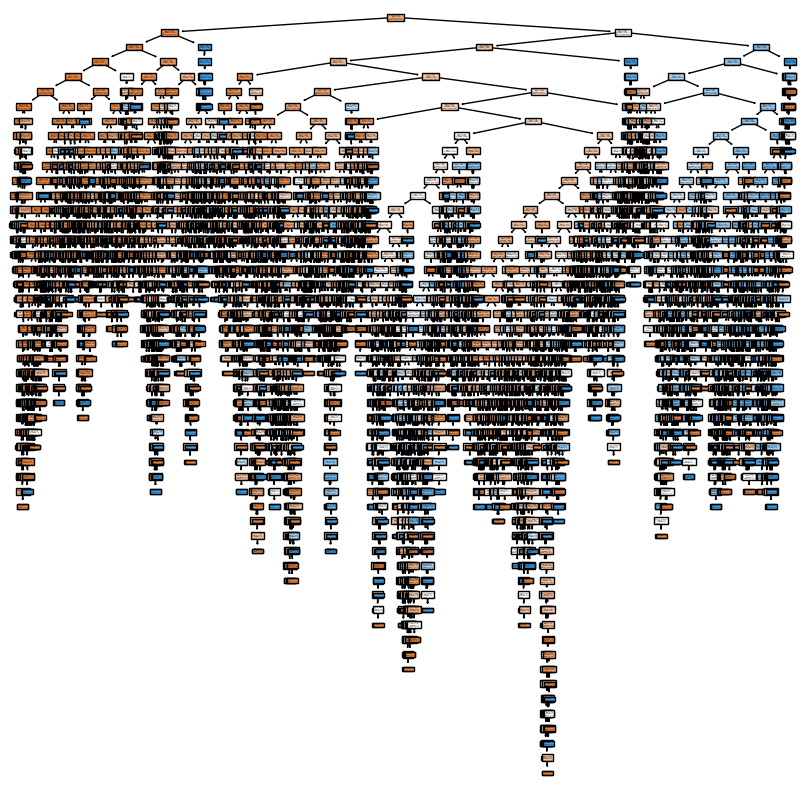

In [53]:
plt.figure(figsize = (10,10))
tree.plot_tree(clf, filled= True)
plt.show()

In [54]:
test_pred = clf.predict(test_input)

In [55]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.88      0.87      0.87     11360
        True       0.61      0.62      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.74      0.75      0.74     15060
weighted avg       0.81      0.81      0.81     15060



#Pruning the Decision Tree iteration 1

In [56]:
clf = tree.DecisionTreeClassifier(random_state = 56, ccp_alpha = 0.1)

In [57]:
clf.fit(train_input, train_target)

DecisionTreeClassifier(ccp_alpha=0.1, random_state=56)

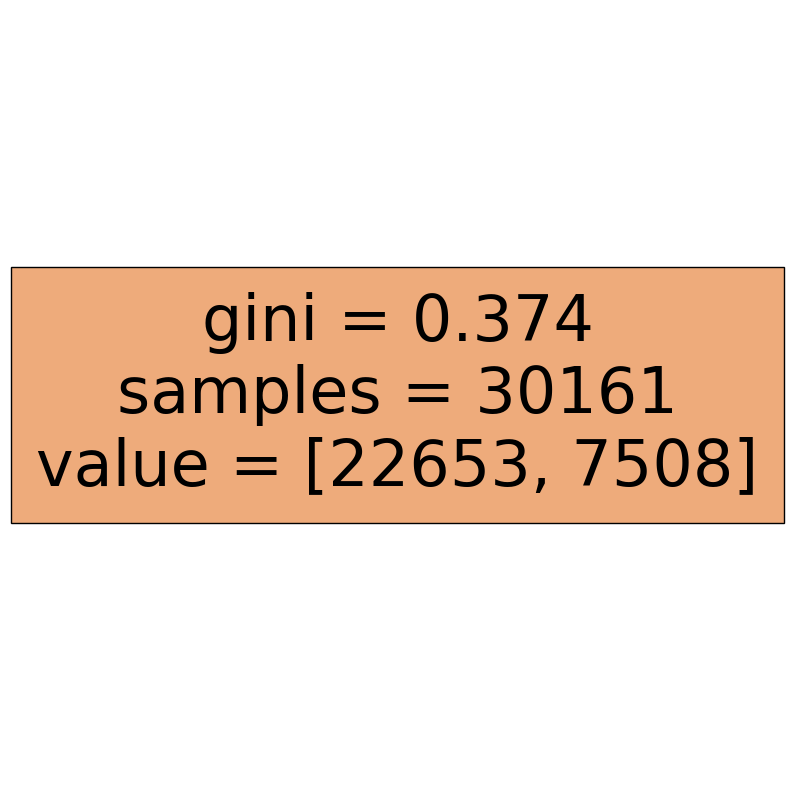

In [59]:
plt.figure(figsize = (10,10))
tree.plot_tree(clf, filled = True)
plt.show()

In [54]:
test_pred = clf.predict(test_input)

In [55]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.88      0.87      0.87     11360
        True       0.61      0.62      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.74      0.75      0.74     15060
weighted avg       0.81      0.81      0.81     15060



#Pruning the Decision Tree iteration 2

In [60]:
clf = tree.DecisionTreeClassifier(random_state = 56, ccp_alpha = 0.01)

In [61]:
clf.fit(train_input, train_target)

DecisionTreeClassifier(ccp_alpha=0.01, random_state=56)

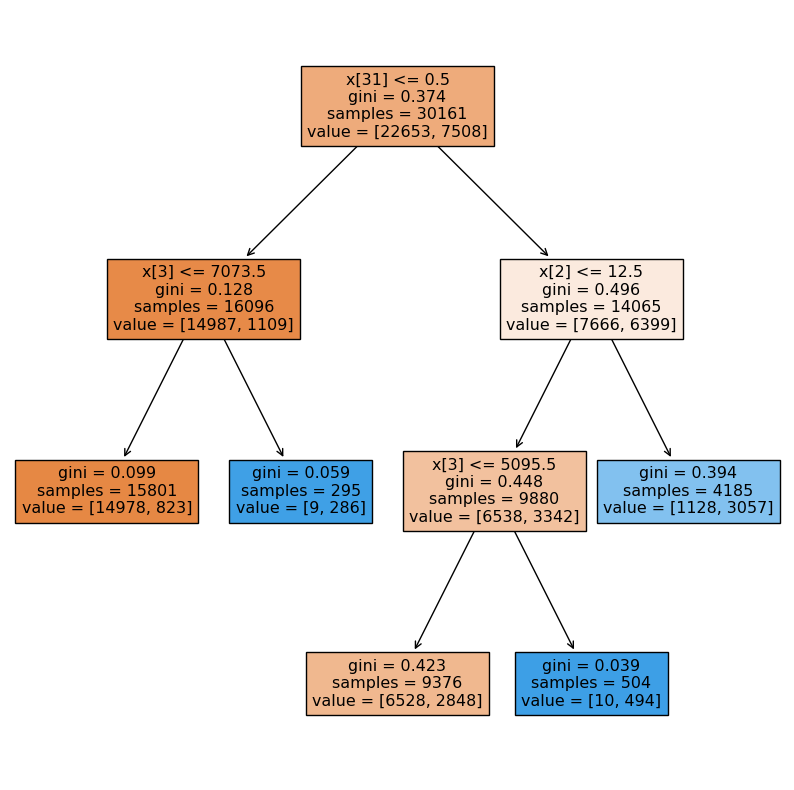

In [63]:
plt.figure(figsize = (10,10))
tree.plot_tree(clf, filled = True)
plt.show()

In [54]:
test_pred = clf.predict(test_input)

In [55]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.88      0.87      0.87     11360
        True       0.61      0.62      0.61      3700

    accuracy                           0.81     15060
   macro avg       0.74      0.75      0.74     15060
weighted avg       0.81      0.81      0.81     15060



#Pruning the Decision Tree iteration 3

In [64]:
clf = tree.DecisionTreeClassifier(random_state = 56, ccp_alpha = 0.001)

In [65]:
clf.fit(train_input, train_target)

DecisionTreeClassifier(ccp_alpha=0.001, random_state=56)

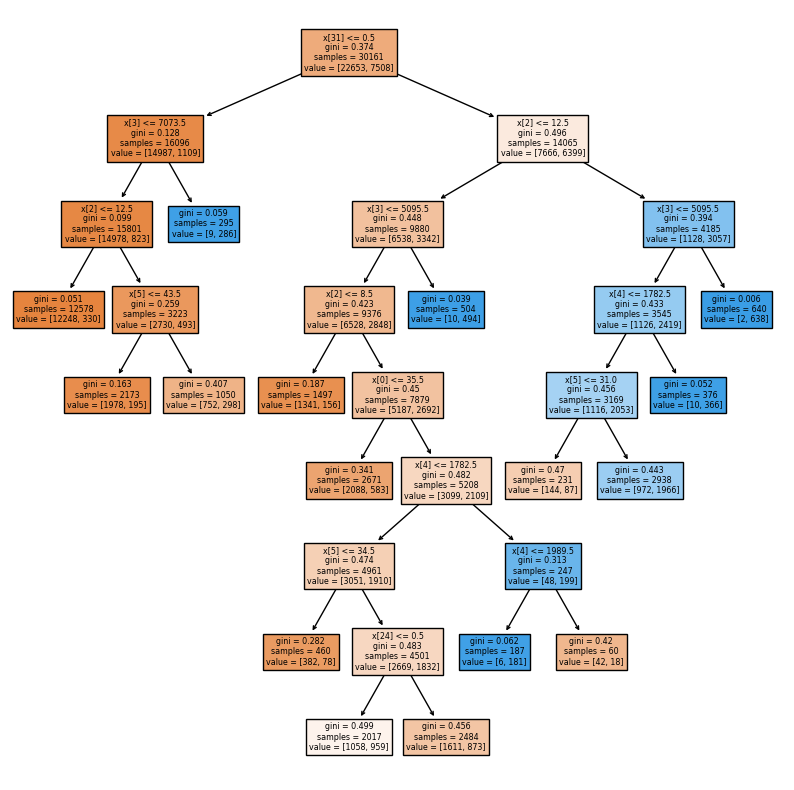

In [66]:
plt.figure(figsize = (10,10))
tree.plot_tree(clf, filled = True)
plt.show()

In [67]:
test_pred = clf.predict(test_input)

In [68]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.86      0.96      0.90     11360
        True       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



## Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
#n_estimators = maximum number of decision trees created by default it is at 100
clfrf = RandomForestClassifier(random_state = 26)


In [73]:
clfrf.fit(train_input, train_target)

RandomForestClassifier(random_state=26)

In [74]:
test_pred = clf.predict(test_input)

In [75]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.86      0.96      0.90     11360
        True       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



iteration#2

In [76]:
clfrf = RandomForestClassifier(random_state = 26, n_estimators = 150)

In [77]:
clfrf.fit(train_input, train_target)

RandomForestClassifier(n_estimators=150, random_state=26)

In [78]:
test_pred = clf.predict(test_input)

In [79]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.86      0.96      0.90     11360
        True       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060



In [80]:
#iteration 3

In [81]:
clfrf = RandomForestClassifier(random_state = 26, n_estimators = 150, ccp_alpha = 0.001)

In [82]:
clfrf.fit(train_input, train_target)

RandomForestClassifier(ccp_alpha=0.001, n_estimators=150, random_state=26)

In [83]:
test_pred = clf.predict(test_input)

In [84]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

       False       0.86      0.96      0.90     11360
        True       0.79      0.51      0.62      3700

    accuracy                           0.85     15060
   macro avg       0.82      0.73      0.76     15060
weighted avg       0.84      0.85      0.83     15060

